In [102]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


,ind_id,gender,car_owner,propert_owner,children,annual_income,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,family_members,label
8,5010864,0,0,0,1,450000.0,-18173.0,-678,1,0,1,1,3,1
9,5010868,0,0,0,1,450000.0,-18173.0,-678,1,0,1,1,3,1
10,5010869,0,0,0,1,450000.0,-18173.0,-678,1,0,1,1,1,1
11,5018498,1,0,0,0,90000.0,-18950.0,-1002,1,1,1,0,2,1
13,5018503,1,0,0,0,90000.0,-18950.0,-1002,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,5024049,1,0,0,1,144000.0,-12903.0,-2924,1,0,0,0,3,0
1542,5118268,0,0,1,1,360000.0,-11294.0,-3536,1,0,1,0,3,0
1544,5023655,1,1,1,0,225000.0,-10229.0,-1209,1,0,0,0,1,0
1545,5115992,0,0,0,2,180000.0,-13174.0,-2477,1,0,0,0,4,0


In [ ]:
import seaborn as sns

credit_df = pd.read_csv('Credit_card.csv')
credit_label_df = pd.read_csv('Credit_card_label.csv')

credits_df = pd.merge(credit_df, credit_label_df, on='Ind_ID')
credits_df.to_csv('merged_credit_data.csv', index=False)

credits_df = credits_df.dropna() 
credits_df.columns = credits_df.columns.str.strip().str.lower().str.replace(' ', '_')
credits_df['gender'] = credits_df['gender'].map({'M':0, 'F':1}) 
credits_df['car_owner'] = credits_df['car_owner'].map({'Y':0,'N':1})
credits_df['propert_owner'] = credits_df['propert_owner']. map({'Y':0, 'N':1})

credits_df_dropped = credits_df.drop(['type_income', 'education', 'marital_status', 'housing_type', 'type_occupation'], axis=1)

credits_df_dropped

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.69      0.79       180
           1       0.19      0.52      0.28        25

    accuracy                           0.67       205
   macro avg       0.55      0.61      0.53       205
weighted avg       0.82      0.67      0.73       205

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.48      0.63       180
           1       0.16      0.72      0.26        25

    accuracy                           0.51       205
   macro avg       0.54      0.60      0.45       205
weighted avg       0.83      0.51      0.59       205



C:\Users\AidaBah\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


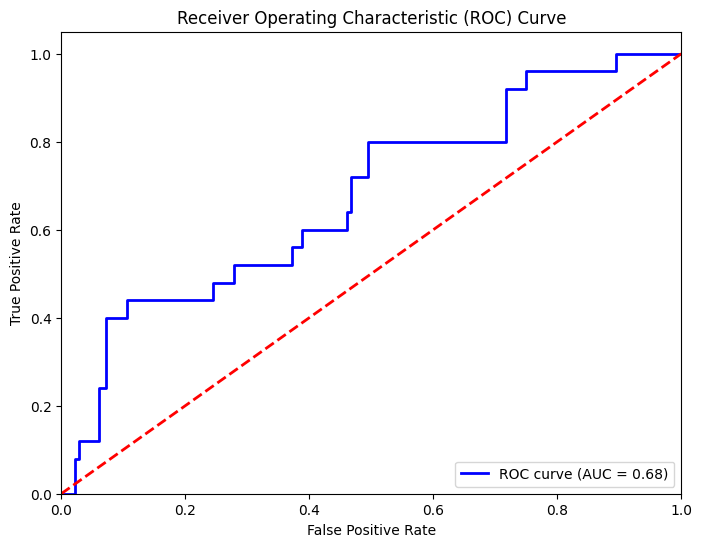

Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       180
           1       0.00      0.00      0.00        25

    accuracy                           0.88       205
   macro avg       0.44      0.50      0.47       205
weighted avg       0.77      0.88      0.82       205

Outlier detection refers to identifying data points that significantly differ from the majority of the dataset.Outliers may result from errors in data collection, measurement inaccuracies, or rare occurrences.Detecting outliers is crucial as they can distort statistical analyses, impact machine learning model performance, and offer insights into data distribution.Methods for outlier detection include statistical techniques like Z-score and boxplot, distance-based approaches such as k-Nearest Neighbors and Local Outlier Factor, clustering-based methods like DBSCAN and Isolation Forest, and model-based techniques like Gaussian Mixtur

C:\Users\AidaBah\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AidaBah\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AidaBah\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [106]:
%pip install imbalanced-learn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter



def additional_cleaning(data: pd.DataFrame) -> pd.DataFrame:
    numeric_data = data.select_dtypes(include=np.number)
    
    Q1 = numeric_data.quantile(0.25)
    Q3 = numeric_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    cleaned_data = data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]
    
    return cleaned_data

cleaned_data = additional_cleaning(credits_df_dropped)
# specified changes: selection of numeric columns, calculation of quartiles and IQR, identification and exclusion of outliers, 

def perform_combined_sampling(data: pd.DataFrame) -> None:
    X = data.drop('label', axis=1)
    y = data['label']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    smoteenn = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)
    
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(X_resampled, y_resampled)
    
    lr_classifier = LogisticRegression()
    lr_classifier.fit(X_resampled, y_resampled)
    
    knn_predictions = knn_classifier.predict(X_test)
    lr_predictions = lr_classifier.predict(X_test)
    
    print("KNN Classification Report:")
    print(classification_report(y_test, knn_predictions))
    
    print("Logistic Regression Classification Report:")
    print(classification_report(y_test, lr_predictions))

perform_combined_sampling(credits_df_dropped)

def create_roc_curve(data: pd.DataFrame) -> None:
    y = data['label']
    X: pd.DataFrame = data.drop('label', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    lr_classifier = LogisticRegression()
    lr_classifier.fit(X_train, y_train)
    
    y_prob = lr_classifier.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

create_roc_curve(credits_df_dropped)

def linear_svm(data: pd.DataFrame) -> None:
    X = data.drop('label', axis=1)
    y = data['label']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    classifier = SVC(kernel='linear')
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    print("Linear SVM Classification Report:")
    print(classification_report(y_test, y_pred))

linear_svm(credits_df_dropped)
# 

def outlier_detection() -> None:
    print("Outlier detection refers to identifying data points that significantly differ from the majority of the dataset."
          "Outliers may result from errors in data collection, measurement inaccuracies, or rare occurrences."
         "Detecting outliers is crucial as they can distort statistical analyses, impact machine learning model performance, and offer insights into data distribution."
         "Methods for outlier detection include statistical techniques like Z-score and boxplot, distance-based approaches such as k-Nearest Neighbors and Local Outlier Factor, clustering-based methods like DBSCAN and Isolation Forest, and model-based techniques like Gaussian Mixture Models and One-Class SVM." 
         "Combining these methods provides a comprehensive approach to outlier detection.")

outlier_detection()

Combination Sampling, KNN & Linear Regression Responses:

Combining sampling techniques, such as the SMOTEENN method used in this case, is a good choice because it addresses both overfitting and imbalance issues simultaneously. This helps in generating synthetic samples for the minority class, making the dataset more balanced, while also cleaning noisy samples and reducing the influence of outliers.  -->

The KNN classifier can better capture the underlying patterns in the data. The synthetic samples generated by SMOTE help in filling the gaps in the feature space, making the decision boundaries more accurate and reducing the bias towards the majority class. Logistic Regression assumes that the data is balanced and may produce biased results when dealing with imbalanced datasets.

Overall, these results suggest that the KNN model performs better at predicting instances of the majority class, label 0, compared to the minority class, label 1.This imbalance in performance metrics between the two classes may indicate that the model needs further optimization or that the dataset requires additional balancing techniques to improve the prediction accuracy for the minority class. 

The logistic regression model performs better at predicting instances of the minority class, label 1, compared to the KNN model, as shown by the higher recall and F1-score for class 1. However, the overall accuracy of the logistic regression model is still low, indicating that further optimization or balancing techniques may be necessary to improve its performance.